# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*


## Exercises: Regularized Polynomial Regression 


Input data: X .. change of water level of a dam, y .. water flowing out of the dam. 

Goal: model the regression relationshop. Generalize the polynomial model by explicit regularization of the Loss. 

Tasks: 

1. Develop Loss function with $l2$ regularization term for polynomial regression;  

2. Run linear regression, plot the resulting model and learning curve (training and testing error agains the number of samples); 

3. Run polynomial regression (degree = 5), plot the resulting model, and the learning curve; 

4. Regularized the model with lambda = 2, plot the resulting model, and the learning curve; 

5. Regularized the model with lambda = 100, plot the resulting model, and the learning curve; 

6. Discuss the effect of regularization. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat

# optimization procedure
from scipy.optimize import minimize 

### Data

In [3]:
data = loadmat('./ex7data.mat')
X_train = np.c_[np.ones_like(data['X']), data['X']]
y_train = data['y']

X_test = np.c_[np.ones_like(data['Xval']), data['Xval']]
y_test = data['yval']

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (12, 2)
y_train: (12, 1)
X_test: (21, 2)
y_test: (21, 1)


### Plot the input data


Text(0, 0.5, 'Water flowing out of the dam (y)')

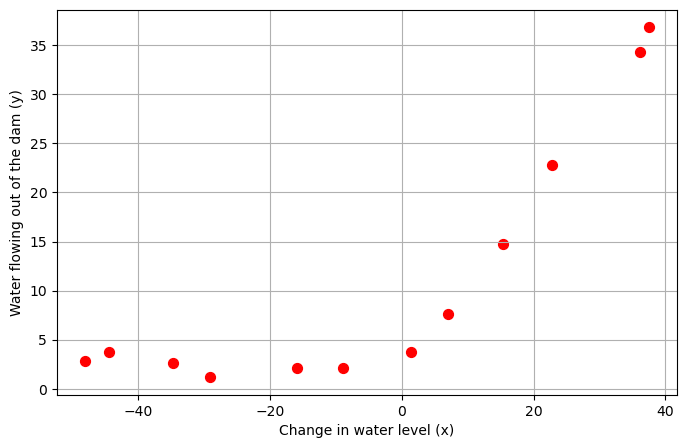

In [4]:
# Plot input data 
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:, 1], y_train, s = 50, c = 'red', marker = 'o', linewidths = 1, label = 'Data')
plt.grid(True)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

### Note: 
The data are definitely not linear, but let's define the linear regression loss function with a second term, the regularization term that controls overfitting and underfitting. A higher $\lambda$ value means smaller parameter ($\theta$) values (danger of underfitting) and vice versa (danger of overfitting).

### Regularized Linear Regression Loss Function

$$L(\theta) = \frac{1}{2m} \Big(\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2\Big) + \frac{\lambda}{2m}\Big(\sum_{j=1}^n \theta_j^2\Big)$$

where $h_\theta(x)$ is the linear model defined by:

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... +  \theta_n x_n $$

where $m$ is the number of training examples, $n$ is the number of parameters, and $\theta_0$ is the bias term which goes unregularized.

In order to minimize this loss function, we also need to calculate the partial derivatives of $L$ with respect to each $\theta_{j}$.

### Linear Regression Partial Derivatives
$ \frac{\partial L(\theta)}{\partial\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} \Big( h_\theta (x^{(i)})-y^{(i)}\Big)x^{(i)}_{j} $      for $ j = 0 $

$ \frac{\partial L(\theta)}{\partial\theta_{j}} = \Big(\frac{1}{m}\sum_{i=1}^{m}  ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j}\Big) + \frac{\lambda}{m}\theta_j$ for $ j \geq1 $

These definitions are different because we do not regularize $\theta_0$, the bias term.


### Task 1. Develop Loss function with $l2$ regularization term

In [ ]:
# Define loss function taking into account the regularization term initialized to 0 
# L_total = Lmse + L_reg 
m = y_train.size
initial_theta = np.ones(X_train.shape[1])
h = np.dot(X_train,initial_theta).reshape((m, 1))
J = (1 / (2 * m)) * np.sum(np.square(h - y_train))
reg = 1
J_reg = (reg / (2 * m)) * initial_theta[1:].T.dot(initial_theta[1:])

Let's  initialize theta as a vector of ones with a dimensionality equal to the number of columns in our matrix $X$. Then we can just pass the function these variables and see what it outputs.

In [5]:
# Define loss function taking into account the regularization term initialized to 0 
# J_total = J + J_reg 

def loss(theta, X, y, reg=0):
    """Loss function to calculate model loss and gradients with regularization 
    """
    m = y.size
    h = np.dot(X,theta).reshape((m, 1))
    J = (1 / (2 * m)) * np.sum(np.square(h - y))
    J_reg = (reg / (2 * m)) * theta[1:].T.dot(theta[1:])
    J_total = J + J_reg
    # gradients (extra output) 
    # grad = ((1 / m)*(X.T.dot(h - y)) + (reg / m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]).ravel()
    
    return J_total

In [6]:
initial_theta = np.ones((X_train.shape[1], 1))

In [7]:
# Test the losss() function with some data 
initial_theta = np.ones((X_train.shape[1], 1))
# initial_grad
initial_loss  = loss(initial_theta, X_train, y_train)
print("Initial loss: {0}".format(initial_loss))

Initial loss: [[303.95152555]]


#### Optimize

Now, we optimize our parameter values using the scipy function `minimize()`, taking as parameters: 

`fun = loss` .. loss function, as defined 

`x0 = theta` .. initial values of model parmeters theta 

`args = (X, y, reg)` inputs 

`jac = True` .. jac : bool or callable, optional Jacobian (gradient) of objective function. 

In [8]:
# Define optimization procedure using scipy minimize()
# Return optimal theta 

def optimalTheta(theta, X, y, reg = 0):
    res = minimize(fun = loss, x0 = theta, args = (X, y, reg),  jac=True)
    
    return res.x

In [ ]:
#---

In [ ]:
# TEST: REMOVE IT! 
def test_loss(x, y, w, reg=0):
    m = len(x)
    total_error = 0.0 
    for i in range(m):
        total_error += (y[i] - (w*x[i]))**2
    J_total = total_error / m
    
    return J_total

In [ ]:
# TEST: REMOVE IT! 
def test_optimalTheta(theta, X, y, reg = 0):
    res = minimize(fun = test_loss, x0 = theta, args = (X, y, reg),  jac = True)
    
    return res.x

In [ ]:
# TEST: REMOVE IT! 
initial_theta = 0
theta_optim = test_optimalTheta(initial_theta, X_train[:,1], y_train)
print(theta_optim)

In [ ]:
#---

### Task 2. Run linear regression 


In [ ]:
# Define the model (linear, generic)

pass

In [ ]:
# Find the optimal paramters 
# initialize theta 
pass
# optimize 
pass
# print the result as a test 
pass 

#### Plot the model and data

In [ ]:
# Prepare model data for plot e.g. (-50, 50, 100)
pass 

In [ ]:
# Plot the result (data points and the model)
pass

#### Plot the learning curve

Let's compare our model’s training error with the validation error. These error values are the numbers output by our loss function relative to both datasets. One way to diagnose bias and variance errors is to plot the error relative to the training set and the validation data set. 

In [ ]:
# Define function to get training and testing error against the increasing number of training data 
# from 1 to range of y_train.size 
# store the training and testing error for later plot 

pass

In [ ]:
# Apply the function 

pass 

In [ ]:
# Plot the changing model trainin and testing error against the increasing number of training examples 
# (x: Number of training examples, y: Loss)

pass

Our error is high when the number of training examples increases, which is the exact opposite of what we should expect to see. This is definitely a high bias problem. Linear regression is just too simple to fit this dataset.

### Task 3. Run polynomial regression

Addressing a simple linear model means adding more features which are no longer linear, but are instead the features being raised to higher powers. Explicitly, we will redefine $h$ as

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 * (waterLevel) + \theta_2 * (waterLevel)^2 + ... +  \theta_p * (waterLevel)^p $$
$$ = \theta_0 + \theta_1 x_1 + \theta_2 x_2^2 + ... +  \theta_n x_n^p $$

... we are  squaring, cubing, etc the columns of our $X$ matrix and then multiplying these new features by new parameters $\theta$ and adding all that together. This is called **feature mapping** -- we are mapping the old features to a higher dimension. Let's code it up! We will also code up **feature normalization**, which is defined as

$$ X_{norm} = \frac{(X - \mu)}{\sigma} $$

where $\mu$ is the mean and $\sigma$ is the standard deviation. We do feature normalization because after feature mapping, the values need to be rescaled.


In [ ]:
# Feature transformation function to given degree of polynomial 
# and feature normalization 

def polyFeatures(X, p):
    """Function to transform input features X into 
       polynomial of defiend degree and  normalize the features! 
       Returns both, original X and the transformed normalizaed X_norm
    """
    for i in np.arange(p):
        dim = i + 2
        X = np.insert(X, X.shape[1], np.power(X[:,1], dim), axis = 1)
    
    X_norm = X
    # Column wise
    means = np.mean(X_norm, axis=0)
    X_norm[:, 1:] = X_norm[:, 1:] - means[1:]
    stds = np.std(X_norm, axis = 0)
    X_norm[:, 1:] = X_norm[:, 1:] / stds[1:]
    
    return X, X_norm    

Now we need to fit theta to our new higher dimensional $X$ matrix and plot the fit. 

### Fit polynomial

In [ ]:
# Design decision is to use polynomial model with degree 5 
degree = 5

In [ ]:
# Prepare polynomial X (transform) 
pass 

# Initialize theta 
pass 

# Optimize 
pass 

#### Plot data and the resulting model

In [ ]:
# Prepare model data for plot (linear data X from -50 to 50)

pass 

In [ ]:
# Plot figures (data and resulting model)

pass 

There is definitely low training error, however, this fit is far too complex. The model is overfited (high variance), so we now have the opposite problem. Let's plot the new learning curve.

#### Plot the learning curve

In [ ]:
# Prepare polynomial X_train and X_test

pass 

In [ ]:
# Use (re-define) function to get training and testing error against the increasing number of training data 
# from 1 to range of y.size 
# update the initial theta 

pass 

In [ ]:
# Plot result (x: Number of training examples, y: Loss)

pass

The training error is basically zero, but it would also be nice if the validation error was also low. The model does not generalize well to data that were not used to optimize its parameter values. 

### Task 4. Regularize the model 

and adjust regularizing parameter $\lambda$

Try using a $\lambda$-value of $2$ and see what happens to our polynomial regression fit and the learning curves.

In [ ]:
# Initialize theta 
pass

# Optimize, reg = 2 
pass 

In [ ]:
# Prepare model data for plot 
pass

In [ ]:
# Plot (x: Change in water level, y: Water flowing out of the dam)

pass

#### Plot the learning curve

In [ ]:
# Udated learning curve function with reg parameter 

pass

In [ ]:
# run the function to get the data 

pass 

In [ ]:
# Plot result (x: Number of training examples, y: Loss)

pass 

As the above plots show, we no longer fit the training set perfectly, however, our cross-validation error has significantly decreased to the point where it is almost the same as our training error. This is encouraging and an indicator of a model that can generalize well.


### Task 5. Regularize the model with high lambda

What happens if we set $\lambda$ up to something  high, $100$ for example?

In [ ]:
# initialize the theta 
pass 

# optimize, reg = 100 

pass 

In [ ]:
# Prepare model data for plot 

pass

In [ ]:
# Plot

pass 

#### Plot the learning curve

In [ ]:
# prepare the data

pass 

In [ ]:
# Plot

pass 

Now we're back to the problem we had with our linear model; the model is underfit! When $\lambda$ is too high, the values of $\theta$ are pushed too close to zero and cannot fit the data well. As such, we do poorly on both the training and cross-validation data. Playing with the value of $\lambda$ to find the best fit is the eternal struggle of machine learning, even in neural networks!


### 6. Discuss the effect of regularization

In [ ]:
# In written form, if you have finished in advance to the others. 